**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")
ana_compa = ComparisonAnalysis('comparison')

Visualization of the Train and Test Error (RMSE) Evolution. 


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>


In [2]:
%%capture
a = error_evolution_plot(ana_compa.logs)

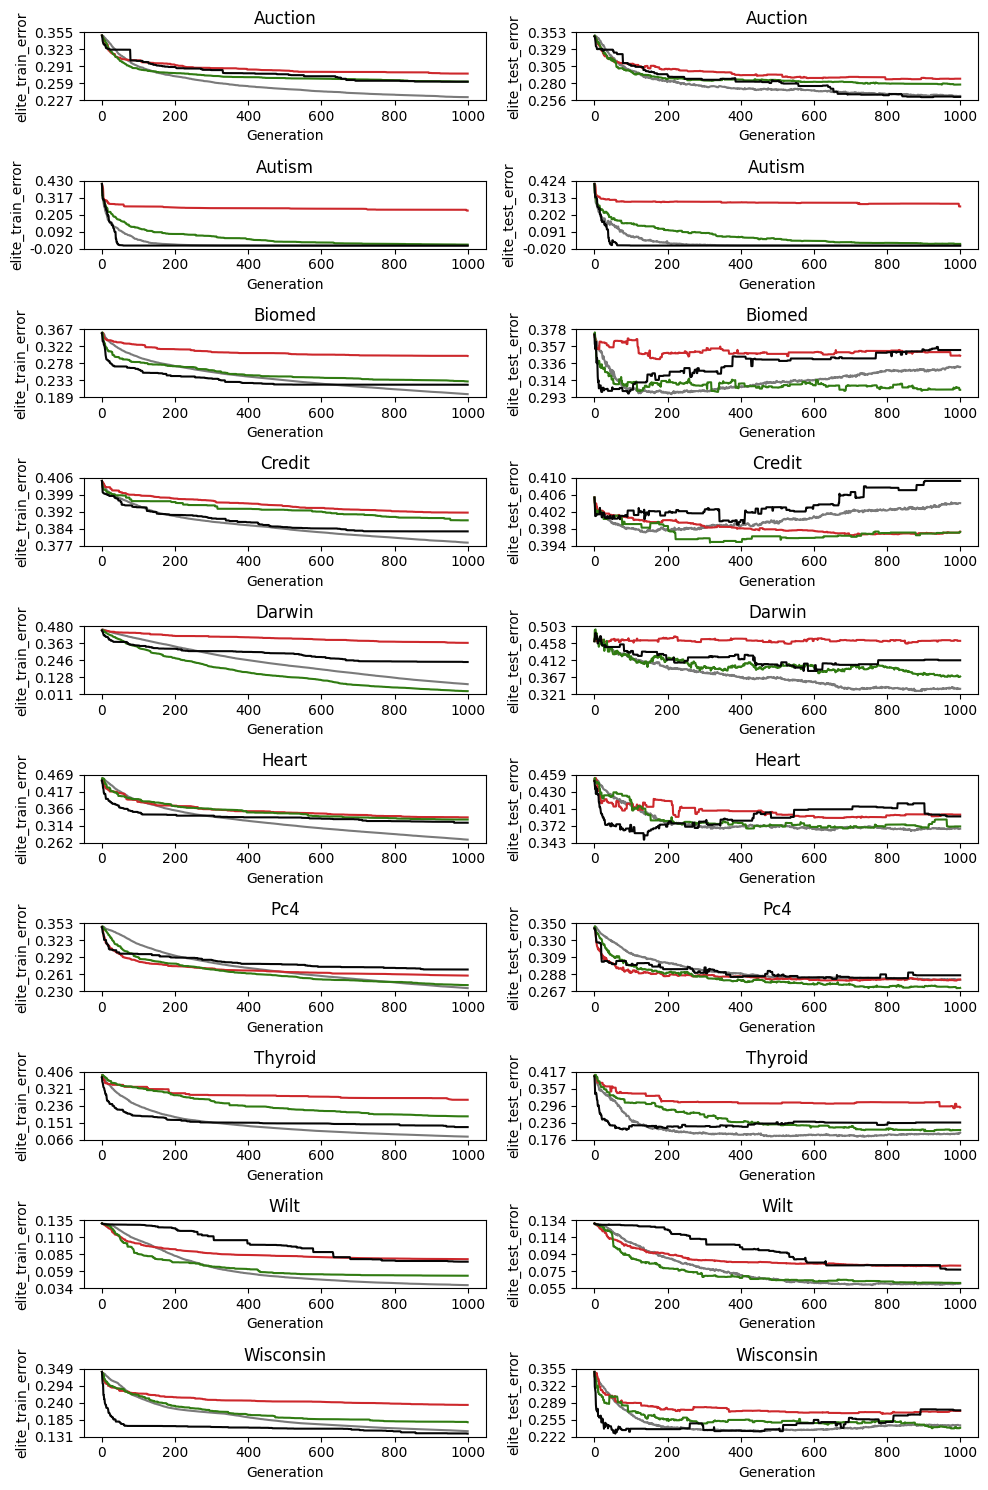

In [3]:
a

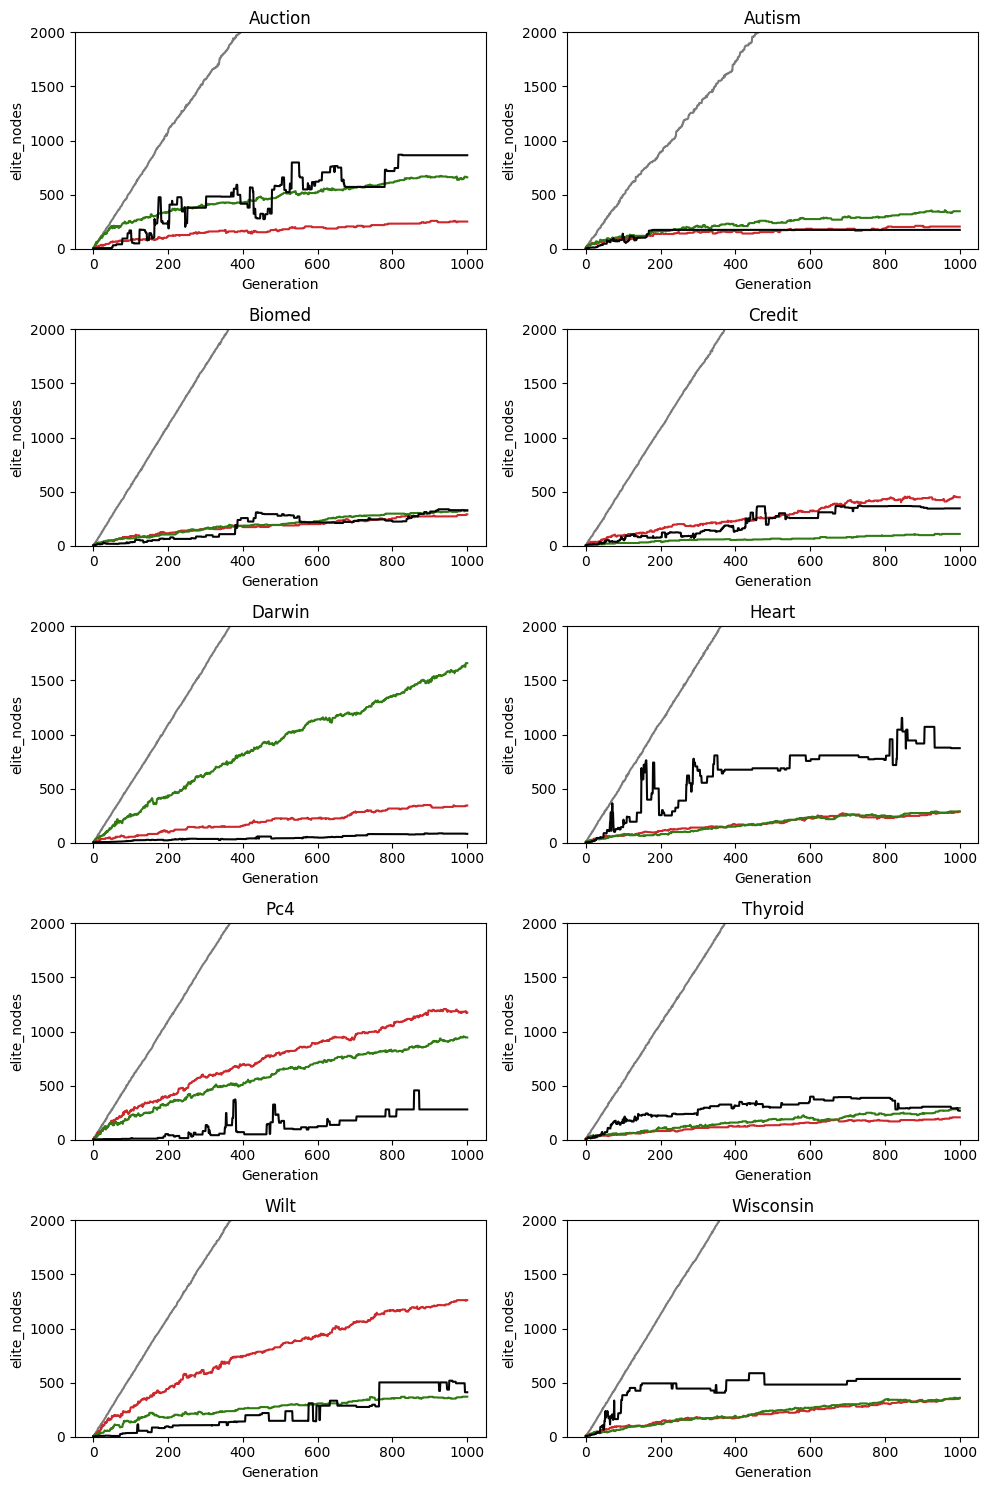

In [4]:
tree_size_evolution_plot(ana_compa.logs)

In [5]:
ana_compa.wtl_detailed[ana_compa.wtl_detailed['dataset_name'] == 'auction']

,dataset_name,name,metric,win,tie,loss,sum,rank


In [6]:
ana_compa.wtl_1v1

,metric,name_1,name_2,win,tie,loss
0,test.accuracy,GP,GSGP,0,8,2
1,test.accuracy,GP,SLIM*SIG1,8,2,0
2,test.accuracy,GP,SLIM+SIG1,1,8,1
3,test.accuracy,GSGP,SLIM*SIG1,8,2,0
4,test.accuracy,GSGP,SLIM+SIG1,1,9,0
5,test.accuracy,SLIM*SIG1,SLIM+SIG1,0,2,8
6,test.f1_score,GP,GSGP,0,8,2
7,test.f1_score,GP,SLIM*SIG1,6,4,0
8,test.f1_score,GP,SLIM+SIG1,1,7,2
9,test.f1_score,GSGP,SLIM*SIG1,7,3,0


In [7]:
ana_compa.wtl_agg

,metric,name,win,tie,loss,rank
0,test.accuracy,GP,9,18,3,2.20
1,test.accuracy,GSGP,11,19,0,1.95
2,test.accuracy,SLIM*SIG1,0,6,24,3.70
3,test.accuracy,SLIM+SIG1,9,19,2,2.15
4,test.f1_score,GP,7,19,4,2.35
5,test.f1_score,GSGP,10,20,0,2.00
6,test.f1_score,SLIM*SIG1,0,10,20,3.50
7,test.f1_score,SLIM+SIG1,9,19,2,2.15
8,test.roc_auc,GP,2,20,8,2.80
9,test.roc_auc,GSGP,13,15,2,1.95


In [8]:
get_friedman_rank_pvalues(ana_compa.wtl_detailed, 'name')

,metric,p_value,significant
0,test.accuracy,0.000218,True
1,test.f1_score,0.000949,True
2,test.roc_auc,0.039602,True
3,nodes_count,0.000104,True
4,test.rmse,0.030845,True


In [9]:
get_wilcoxon_rank_pvalues(ana_compa.wtl_detailed, 'name')

,metric,name_1,name_2,p_value,significant
0,test.accuracy,GP,GSGP,0.102470,False
1,test.accuracy,GP,SLIM*SIG1,0.010321,True
2,test.accuracy,GP,SLIM+SIG1,0.712702,False
3,test.accuracy,GSGP,GP,0.102470,False
4,test.accuracy,GSGP,SLIM*SIG1,0.009375,True
5,test.accuracy,GSGP,SLIM+SIG1,0.256839,False
6,test.accuracy,SLIM*SIG1,GP,0.010321,True
7,test.accuracy,SLIM*SIG1,GSGP,0.009375,True
8,test.accuracy,SLIM*SIG1,SLIM+SIG1,0.008386,True
9,test.accuracy,SLIM+SIG1,GP,0.712702,False


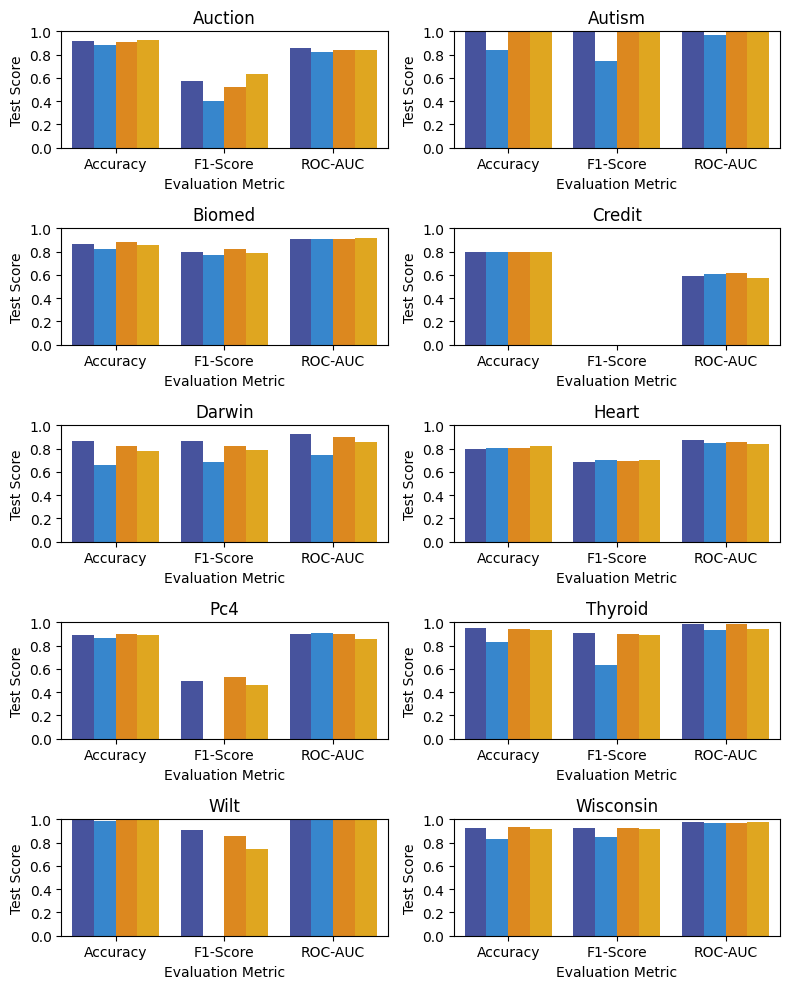

In [10]:
plot_performance_barplot(ana_compa.results_median.rename(columns= {'test.accuracy': 'Accuracy', 'test.f1_score': 'F1-Score', 'test.roc_auc': 'ROC-AUC'}), ['Accuracy', 'F1-Score', 'ROC-AUC'], groupby='name', palette =['#3949ab', '#1e88e5' , '#fb8c00','#ffb300'])

In [11]:
ana_compa.wtl_1v1

,metric,name_1,name_2,win,tie,loss
0,test.accuracy,GP,GSGP,0,8,2
1,test.accuracy,GP,SLIM*SIG1,8,2,0
2,test.accuracy,GP,SLIM+SIG1,1,8,1
3,test.accuracy,GSGP,SLIM*SIG1,8,2,0
4,test.accuracy,GSGP,SLIM+SIG1,1,9,0
5,test.accuracy,SLIM*SIG1,SLIM+SIG1,0,2,8
6,test.f1_score,GP,GSGP,0,8,2
7,test.f1_score,GP,SLIM*SIG1,6,4,0
8,test.f1_score,GP,SLIM+SIG1,1,7,2
9,test.f1_score,GSGP,SLIM*SIG1,7,3,0


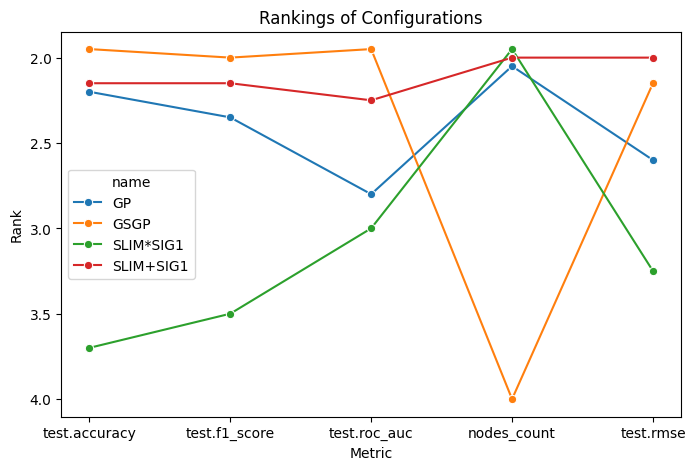

In [12]:
plot_ranks(ana_compa.wtl_agg, 'name')

Median Test Error of the Final Individual

Visualization of the Tree Size Evolution


<span style="color:#050505;">&#9632; GP</span>
<span style="color:#7a7a7a;">&#9632; GSGP</span>
<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

Median Tree Size of the final Individual 

Friedman Test results